# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with GDP data taken from the International Monetary Fund.

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. XXXXXX
2. YYYYYY
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [367]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
#import folium
#from folium.plugins import MarkerCluster

# Problem 1 - Data Handling
The basis of your work will be the following GDP dataset:

In [368]:
gdp = pd.read_csv("GDP_IMF.csv", sep=";")
gdp.head(5)

,Country,year,GDP
0,Afghanistan,1992,no data
1,Albania,1992,0.843
2,Algeria,1992,49.217
3,Andorra,1992,no data
4,Angola,1992,9.395


#### a)
As you can see, there are many missing values in the data. <br>
Before you can continue, you need to handle them. Proceed as follows:
- Delete those countries with no data at all (if any)
- Either delete the missing years for each country or use the years close by to approximate the missing value <br> *Example: Year 2004 is missing, but 2003 and 2005 are available; use the mean of GDP in 2003 and 2005 to replace missing year 2004.*

In [369]:
# Pivot Dataframe into a clearer structure and set index
pivot_gdp = gdp.pivot(index='Country', columns='year', values='GDP')

In [370]:
# Replace "no data" with NaN for better handling and then check for the amount of NaN entries
pivot_gdp.replace('no data', np.nan, inplace=True)
pivot_gdp['NaN_count'] = pivot_gdp.isna().sum(axis=1)

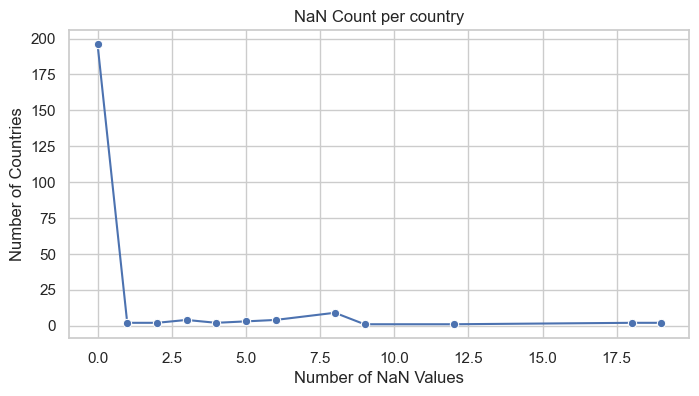

In [371]:
# Draw a plot of the NaN occurences
# Set the style of the plot
sns.set_style('whitegrid')

# Count the frequency of each NaN count
nan_count_freq = pivot_gdp['NaN_count'].value_counts().sort_index()

# Create line plot
plt.figure(figsize=(8,4))
sns.lineplot(x=nan_count_freq.index, y=nan_count_freq.values, marker='o')

plt.title('NaN Count per country')
plt.xlabel('Number of NaN Values')
plt.ylabel('Number of Countries')
plt.show()

In [372]:
# There is no country with no entries at all
pivot_gdp[pivot_gdp['NaN_count'] == 37]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,


In [373]:
# All countries with an NaN count for => 9 years are dropped
# This means they have less than 75% of the total timespan of 30 years covered
# Qualitative analysis also showed that most of their NaN values where next to each other which made them less suitable for interpolation

gdp_clean = pivot_gdp[pivot_gdp['NaN_count'] < 9]

In [374]:
# Convert entries to numeric
gdp_clean2 = gdp_clean.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [375]:
# Fill NaNs with the average of the surrounding values where it is possible
# (window set at five limits the amount of NaNs that can be filled this way)
# Fill the remaining NaNs via interpolation

final_gdp = gdp_clean2.fillna(gdp_clean2.rolling(5, min_periods=2, center=True, axis=1).mean())
final_gdp2 = final_gdp.interpolate(method='linear', axis=1, limit_direction='both')

In [376]:
#Short check if there a still NaN-Values
final_gdp2['NaN_count2'] = final_gdp2.isna().sum(axis=1)
final_gdp2[final_gdp2['NaN_count2'] > 0]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,


#### b)
We are only interested in the data on a country level and for years already passed. <br>
The dataset, however, also contains information on whole regions such as the EU or G7. <br>
It also contains predictions for GDP in the upcoming years. <br>
Delete these observations from the data. <br>
*Hint: Get a list of all unique values of the Country column.*

In [377]:
# Drop years in the future
final_gdp2.drop(columns=[2023,2024,2025,2026,2027,2028], axis=0, inplace=True)

In [378]:
# Generate a list of all countries to eliminate Regions and other umbrella terms via visual inspection
final_gdp2.index.values.tolist()

['ASEAN-5',
 'Advanced economies',
 'Africa (Region)',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia and Pacific',
 'Australia',
 'Australia and New Zealand',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean',
 'Central African Republic',
 'Central America',
 'Central Asia and the Caucasus',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia',
 'Eastern Europe ',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Emerging and Develo

In [379]:
# Create blacklist
blacklist = ['ASEAN-5', 'Advanced economies', 'Africa (Region)', 'Asia and Pacific', 'Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia and the Caucasus', 'East Asia','Eastern Europe ', 'Emerging and Developing Asia', 'Emerging and Developing Europe', 'Emerging market and developing economies',  'Euro area', 'Europe', 'European Union', 'Latin America and the Caribbean', 'Major advanced economies (G7)',  'Middle East (Region)', 'Middle East and Central Asia',  'North Africa', 'North America',  'Other advanced economies', 'Pacific Islands ',  'South America', 'South Asia', 'Southeast Asia',  'Sub-Saharan Africa (Region) ',  'Sub-Saharan Africa',  'West Bank and Gaza', 'Western Europe', 'Western Hemisphere (Region)', 'World']

In [380]:
# Drop blacklist
final_gdp3 = final_gdp2.drop(blacklist)

# Problem 2 - Data Visualization
#### a)
To get some first insights in the data, create meaningful plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [381]:
# wieder rausmachen:
final_gdp3


year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2015,2016,2017,2018,2019,2020,2021,2022,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,
Albania,0.843,1.461,2.361,2.882,3.200,2.259,2.560,3.209,3.483,3.928,...,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.509,0.0,0
Algeria,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,165.979,160.034,167.498,174.868,171.673,145.656,163.138,195.415,0.0,0
Andorra,1.488,1.488,1.488,1.488,1.488,1.488,1.488,1.488,1.429,1.547,...,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.400,8.0,0
Angola,9.395,6.819,4.965,6.197,7.994,9.388,7.958,7.526,11.166,10.930,...,116.194,101.124,122.022,101.353,84.516,57.139,74.791,121.417,0.0,0
Antigua and Barbuda,0.499,0.535,0.589,0.577,0.634,0.681,0.728,0.766,0.826,0.800,...,1.337,1.437,1.468,1.606,1.688,1.370,1.471,1.682,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,60.400,59.865,58.357,77.427,70.536,85.684,91.836,97.517,117.596,123.119,...,125.449,112.915,115.883,102.021,73.003,43.788,57.148,93.111,4.0,0
Vietnam,12.528,16.736,20.712,26.407,31.352,34.146,34.580,36.444,39.585,41.297,...,236.795,252.146,277.071,304.470,331.818,346.310,369.736,406.452,0.0,0
Yemen,17.959,21.737,28.019,12.796,6.496,6.838,6.322,7.639,9.679,9.853,...,42.444,31.318,26.842,21.606,21.888,18.373,16.957,20.645,0.0,0


100218.398


<BarContainer object of 20 artists>

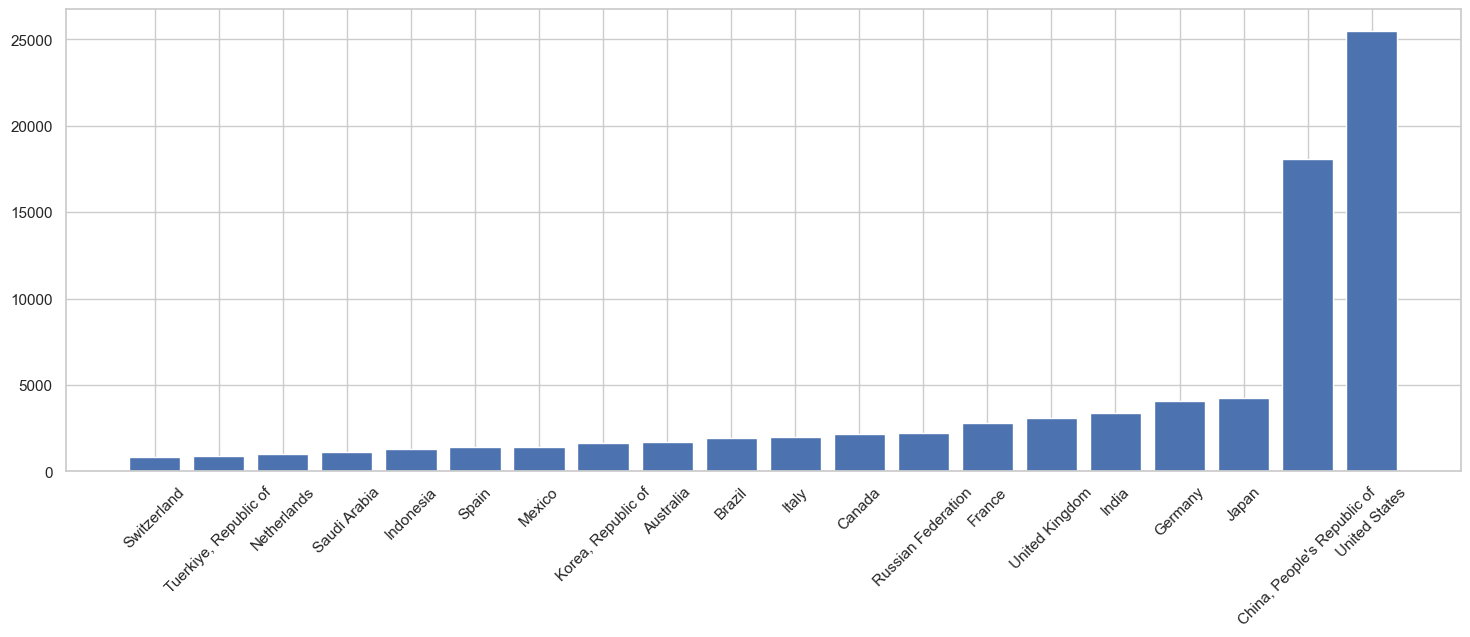

In [382]:

y = final_gdp3[2022].sort_values()
y = y.tail(20)
treshhold = final_gdp2.loc["World"][2022]

print(treshhold)
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
plt.bar(y.index,y)


1414.101


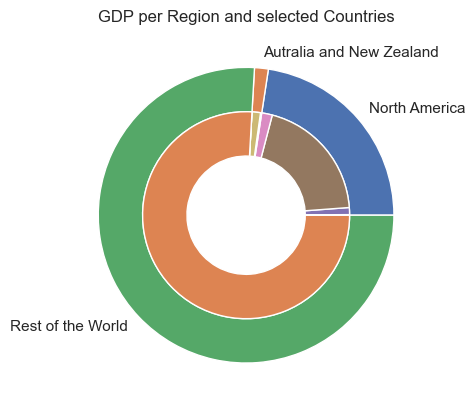

In [383]:
# for this database we access the gdp2 plot since we also use the regional data for a better overview

db2022 = final_gdp2[2022]

fig, ax = plt.subplots()

australia = db2022.loc['Australia']
usa = db2022.loc['United States']
mexico = db2022.loc['Mexico']
canada = db2022.loc['Canada']
continetAustralia = db2022.loc['Australia and New Zealand'] - australia
continetNorthAmerica = db2022.loc['North America'] - usa - mexico - canada
continentAsia = db2022.loc['Australia and New Zealand']
world = db2022.loc['World'] - continetNorthAmerica -continetAustralia - continentAsia
print(mexico)


size = 0.3
vals = np.array([[continetNorthAmerica, mexico, usa, canada], [continetAustralia, australia, 0, 0], [world, 0,0,0]])

cmap = plt.colormaps["tab20c"]
# outer_colors = cmap(np.arange(3)*4)
# inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, labels=["North America","Autralia and New Zealand", "Rest of the World"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size,
     wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='GDP per Region and selected Countries')
plt.show()


In [404]:
# checking who where the leading economies in every year
top=10

dfEdit = final_gdp3.drop(columns=["NaN_count", "NaN_count2"])
dfTop20All = dfEdit[1992].sort_values().tail(top)
dfEdit = dfEdit.drop(columns=[1992])

for year in dfEdit.columns:
    dfTop20Current = dfEdit[year].sort_values().tail(top)
    dfTop20All = pd.merge(dfTop20All, dfTop20Current,
                       left_index=True, right_index=True, how='outer')
listdfTop20All = dfTop20All.index.to_list()

dfTop20All = dfEdit.loc[listdfTop20All]
dfTop20All


year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,429.184,546.764,770.860,851.146,883.862,864.307,599.642,655.454,559.982,509.798,...,2471.718,2456.055,1800.046,1796.622,2063.519,1916.934,1873.286,1476.092,1648.699,1924.134
Canada,579.059,579.913,605.941,630.598,655.010,634.004,678.417,744.631,738.968,760.149,...,1846.595,1805.751,1556.508,1527.996,1649.266,1725.300,1743.725,1647.598,2001.487,2139.840
"China, People's Republic of",617.433,561.686,730.996,860.468,957.991,1024.167,1088.346,1205.532,1333.649,1465.829,...,9624.928,10524.241,11113.508,11226.897,12265.327,13841.812,14340.600,14862.564,17759.307,18100.044
France,1324.236,1396.653,1602.130,1606.035,1454.555,1505.184,1494.634,1366.243,1377.667,1500.348,...,2811.918,2856.701,2439.436,2472.282,2594.235,2792.223,2729.171,2635.921,2957.423,2784.020
Germany,2072.457,2209.934,2588.002,2498.113,2214.694,2242.065,2197.125,1948.843,1945.804,2077.016,...,3733.859,3890.095,3357.926,3468.896,3689.547,3976.246,3888.655,3886.555,4262.767,4075.395
India,284.194,333.014,366.600,399.791,423.189,428.767,466.867,476.610,493.953,523.970,...,1856.721,2039.127,2103.588,2294.797,2651.474,2702.930,2835.606,2671.596,3150.307,3386.403
Italy,1047.616,1080.544,1175.278,1312.783,1243.228,1271.701,1253.690,1147.183,1168.032,1275.867,...,2141.954,2162.567,1836.824,1876.554,1961.104,2092.881,2011.524,1895.692,2115.762,2012.013
Japan,4544.766,4998.798,5545.566,4923.393,4492.449,4098.363,4635.982,4968.360,4374.710,4182.845,...,5212.328,4896.995,4444.931,5003.678,4930.837,5040.881,5117.995,5048.790,5005.537,4233.538
"Korea, Republic of",392.731,463.432,566.595,610.164,570.594,382.855,497.254,576.483,547.743,626.989,...,1370.633,1484.489,1466.039,1499.362,1623.074,1725.373,1651.423,1644.676,1810.966,1665.246


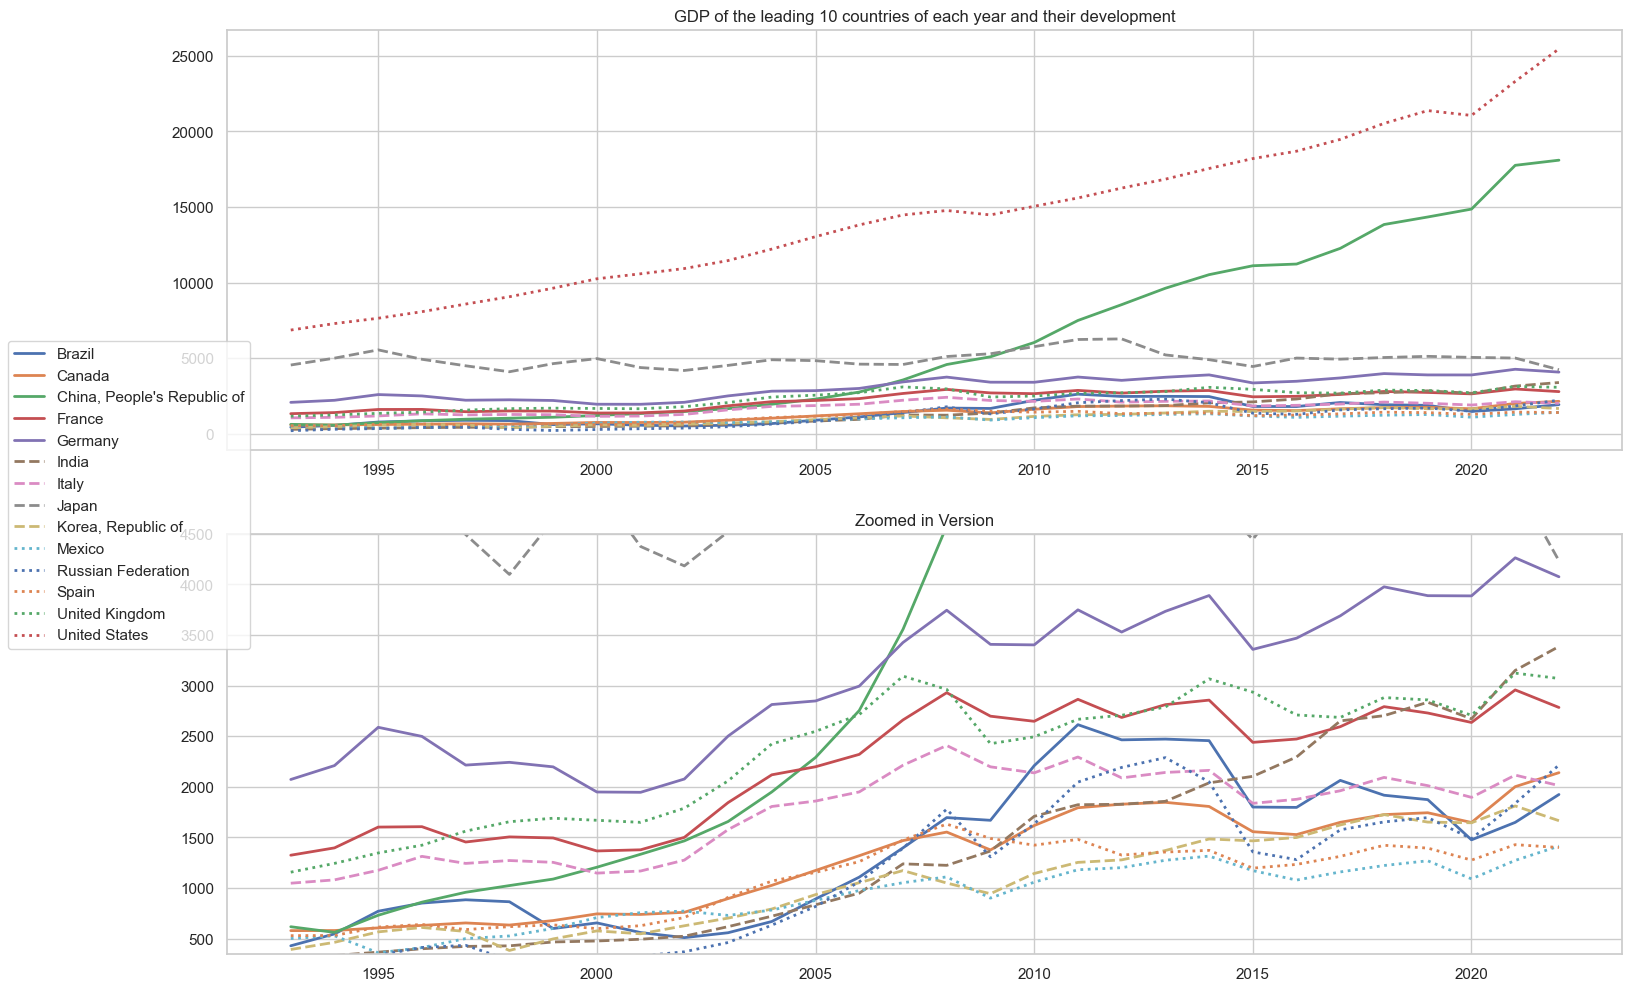

In [408]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))


y = dfTop20All.columns.to_list()
x = dfTop20All.values.tolist()

i=0

linewidth = 2
linestyle = "-"

while (i < len(x)):
    if(i>4 and i<9):
        linestyle = "--"
    if (i >= 9 ):
        linestyle = ":"

    axes[0].plot(y, x[i], linestyle=linestyle, linewidth=linewidth)
    axes[1].plot(y, x[i], linestyle=linestyle, linewidth=linewidth)
    i=i+1

axes[1].set_ylim([350, 4500])
axes[0].set_title('GDP of the leading 10 countries of each year and their development')
axes[1].set_title('Zoomed in Version')

fig.legend(dfTop20All.index.to_list(), loc=6)




In [ ]:
# add legend for each country https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html


#### b)
Pick a year with as little missing values as possible. <br>
For this year, create an interactive map with `folium` that tells you the GDP in the country in the given year. <br>
*Hint: Be cautious with country names.*

In [21]:
# In task 1 we had removed countries with too much Nan values, as well we replaced NaN values by average value. To find out in which year we replaced most values by estimations, we decided
# to analyise the original dataframe again



dfNan = pd.DataFrame(columns=['year', 'NaNcount'], data=[])

pivot_gdp.columns
i = 0
for element in pivot_gdp.columns:
    NaNcount = pivot_gdp[element].isna().sum()
    new_row = [element, NaNcount]
    dfNan.loc[len(dfNan)] = new_row
dfNan = dfNan.set_index(["year"])
dfNan.drop(dfNan.tail(1).index, inplace=True)  # drop NaN-count row


In [22]:
minValue = dfNan["NaNcount"].min()
minValue


1

In [23]:
minYears =dfNan[dfNan["NaNcount"]==1]
minYearsList = minYears.index.tolist()
minYearsList


[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [24]:
# as we can see we can decide between the area 2011 up to 2020, they all have the same minimal value of one
import random
minYears.index.tolist()

rand_idx = int(random.random() * len(minYearsList))
random_num = minYearsList[rand_idx]
random_num

# outcome of last iteration was 2016

2013

In [25]:
import folium
from folium.plugins import MarkerCluster



In [26]:
# get lat and lon from each country by using csv file from kaggle: https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state?resource=download&select=world_country_and_usa_states_latitude_and_longitude_values.csv

latLons = pd.read_csv("lat_lon.csv", sep=",")
latLons

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


In [27]:
# check if all countries are included
countryList = final_gdp3.index.to_list()
latLonCountryList = latLons["country"].to_list()

for country in countryList[:]:  
    if (country in latLonCountryList):
       #  print(country)
        countryList.remove(country)
countryList
    

['Bahamas, The',
 'Brunei Darussalam',
 'Cabo Verde',
 "China, People's Republic of",
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 "Cote d'Ivoire",
 'Eswatini',
 'Gambia, The',
 'Hong Kong SAR',
 'Korea, Republic of',
 'Kyrgyz Republic',
 'Lao P.D.R.',
 'Micronesia, Fed. States of',
 'Myanmar',
 'North Macedonia ',
 'Russian Federation',
 'Sao Tome und Principe',
 'Slovak Republic',
 'Taiwan Province of China',
 'Tuerkiye, Republic of']

In [28]:
# as a next step we have to find the missing values by ourselves, by printing the latLonCountryList
latLonCountryList

# original <-- name from the longtidue and latitude dataframe
# Bahamas, The <-- Bahamas
# Brunei Darussalem <-- Brunei
# China, People's Republic of <-- China
# Congo, Dem. Rep. of the <-- Congo [DRC]
# Congo, Republic of <-- Congo [Republic]
# Cote d'Ivoire <-- Côte d'Ivoire
# Eswatini <-- Swaziland
# Gambia, The <-- Gambia
# Hong Kong SAR <-- Hong Kong
# Korea, Republic of <-- North Korea
# Kyrgyz Republic <-- Kyrgyzstan
# Lao P.D.R. <-- Laos
# Micronesia, Fed. States of <-- Micronesia
# Myanmar <-- Myanmar [Burma]
# North Macedonia <-- Macedonia [FYROM]
# Russian Federation <-- Russia
# Sao Tome und Principe <-- São Tomé and Príncipe
# Slovak Republic <-- Slovakia
# Taiwan Province of China <-- Taiwan
# Tuerkiye, Republic of <-- Turkey



['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Netherlands Antilles',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos [Keeling] Islands',
 'Congo [DRC]',
 'Central African Republic',
 'Congo [Republic]',
 'Switzerland',
 "Côte d'Ivoire",
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland 

In [29]:
# correct countries names

latLons["country"] = latLons["country"].replace("Bahamas", "Bahamas, The")
latLons["country"] = latLons["country"].replace("Brunei", "Brunei Darussalem")
latLons["country"] = latLons["country"].replace(
    "China", "China, People's Republic of")
latLons["country"] = latLons["country"].replace(
    "Congo [DRC]", "Congo, Dem. Rep. of the")
latLons["country"] = latLons["country"].replace("Congo [Republic]", "Congo, Republic of ")
latLons["country"] = latLons["country"].replace("Côte d'Ivoire", "Cote d'Ivoire")
latLons["country"] = latLons["country"].replace("Swaziland", "Eswatini")
latLons["country"] = latLons["country"].replace("Gambia", "Gambia, The")
latLons["country"] = latLons["country"].replace("Hong Kong", "Hong Kong SAR")
latLons["country"] = latLons["country"].replace("South Korea", "Korea, Republic of")
latLons["country"] = latLons["country"].replace("Kyrgyzstan", "Kyrgyz Republic")
latLons["country"] = latLons["country"].replace("Laos", "Lao P.D.R.")
latLons["country"] = latLons["country"].replace("Micronesia", "Micronesia, Fed. States of")
latLons["country"] = latLons["country"].replace("Myanmar [Burma]", "Myanmar")
latLons["country"] = latLons["country"].replace("Macedonia [FYROM]", "North Macedonia ")
latLons["country"] = latLons["country"].replace("Russia", "Russian Federation")
latLons["country"] = latLons["country"].replace("São Tomé and Príncipe", "Sao Tome und Principe")
latLons["country"] = latLons["country"].replace("Slovakia", "Slovak Republic")
latLons["country"] = latLons["country"].replace("Taiwan", "Taiwan Province of China")
latLons["country"] = latLons["country"].replace("Turkey", "Tuerkiye, Republic of")

latLons.head(5)



,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [30]:
# remove unnescsary columns

latLons = latLons.drop(columns=["country_code",	"usa_state_code",
                    "usa_state_latitude",	"usa_state_longitude", "usa_state"])
latLons = latLons.set_index(["country"])

latLons


,latitude,longitude
country,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Anguilla,18.220554,-63.068615
...,...,...
Yemen,15.552727,48.516388
Mayotte,-12.827500,45.166244
South Africa,-30.559482,22.937506


In [31]:
dfMap = pd.merge(final_gdp3, latLons, left_index=True, right_index=True)
dfMap.head(20)

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2017,2018,2019,2020,2021,2022,NaN_count,NaN_count2,latitude,longitude
Albania,0.8430,1.4610,2.3610,2.882,3.200,2.259,2.560,3.209,3.483,3.928,...,13.053,15.157,15.399,15.161,18.310,18.509,0.0,0,41.153332,20.168331
Algeria,49.2170,50.9630,42.4260,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,167.498,174.868,171.673,145.656,163.138,195.415,0.0,0,28.033886,1.659626
Andorra,1.4880,1.4880,1.4880,1.488,1.488,1.488,1.488,1.488,1.429,1.547,...,2.993,3.217,3.155,2.885,3.330,3.400,8.0,0,42.546245,1.601554
Angola,9.3950,6.8190,4.9650,6.197,7.994,9.388,7.958,7.526,11.166,10.930,...,122.022,101.353,84.516,57.139,74.791,121.417,0.0,0,-11.202692,17.873887
Antigua and Barbuda,0.4990,0.5350,0.5890,0.577,0.634,0.681,0.728,0.766,0.826,0.800,...,1.468,1.606,1.688,1.370,1.471,1.682,0.0,0,17.060816,-61.796428
Argentina,255.7870,264.4290,287.8350,288.497,304.282,327.436,334.244,316.998,317.759,300.421,...,643.861,524.431,451.815,389.064,486.702,632.241,0.0,0,-38.416097,-63.616672
Armenia,0.1080,0.8350,0.6480,1.287,1.597,1.639,1.892,1.845,1.912,2.118,...,11.527,12.458,13.619,12.642,13.861,19.503,0.0,0,40.069099,45.038189
Aruba,1.3505,1.3505,1.3505,1.321,1.380,1.532,1.665,1.723,1.873,1.896,...,3.092,3.202,3.369,2.610,3.126,3.493,3.0,0,12.521110,-69.968338
Australia,318.0930,309.3080,353.3740,379.071,424.689,426.424,381.387,411.727,399.960,377.780,...,1381.624,1417.030,1385.258,1360.687,1646.391,1701.893,0.0,0,-25.274398,133.775136
Austria,195.5060,190.3830,203.9700,241.234,237.343,213.045,218.557,217.475,197.377,197.510,...,417.114,455.198,444.670,434.877,480.688,471.685,0.0,0,47.516231,14.550072


In [32]:

# setting up color-palette (highest values: blue, lowest values red, in center area white)


i=0
colors = []
while(i<255):
    colors.append('#{:02X}{:02X}{:02X}'.format(
       255,i,i))
    i=i+1



i = 255
while (i > 0):
    colors.append('#{:02X}{:02X}{:02X}'.format(
        i, i, 255))
    i = i-1




In [33]:
from heapq import nlargest, nsmallest

# since Chinas and USA's GDP is more than double as much as to the third strongest economy we cant select them as max value for the palette
# otherwise all the other countries nearly have the same color

res = nlargest(20, dfMap[2016])
print(res)

# as we can see steps at the first 11th - 12th economies are very large, so we start at number 11 with the color palette, to be able to mark minor differences

def gdp_color(x, colors=colors):

    num_colors = len(colors)
    min_UR = min(dfMap[2016])
    max_UR = res[11] # selecting second strongest economy
    steps = np.linspace(min_UR, max_UR, num_colors+1) 
    color = colors[min(np.digitize(x, steps)-1, len(colors)-1)]
    return color



[18695.1, 11226.897, 5003.678, 3468.896, 2709.678, 2472.282, 2294.797, 1876.554, 1796.622, 1527.996, 1499.362, 1280.648, 1263.521, 1233.215, 1078.493, 932.066, 869.28, 783.844, 687.55, 665.999]


In [34]:
# for the map data we went back using the cleaned dataframe "final_gdp3"

map = folium.Map(location=[15,15],zoom_start=3)

for country in dfMap.index:

    selectedCountry = dfMap.loc[country]
    
    popup = folium.Popup(
        f"{country}, GDP in year 2016: <br>{selectedCountry[2016]}", max_width=300)
    color = gdp_color(selectedCountry[2016])
    folium.Marker([selectedCountry["latitude"], selectedCountry["longitude"]], popup=popup, icon=folium.Icon(
        color='black', icon_color=color, icon="location-pin", prefix="fa")).add_to(map)

map


# Problem 3 - Supervised Machine Learning
#### a)
First, try to predict the GDP in a given year and in a given country using the data from the past years. <br>
Report the performance (measured in mean squared error) for different numbers of lags. 

In [17]:
# Import the libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
# Transform and Normalize GDP-Data
df_supervised = pd.DataFrame.transpose(final_gdp3)
df_supervised = df_supervised.drop(["NaN_count", "NaN_count2"])
df_supervised_norm = (df_supervised - df_supervised.mean())/df_supervised.std()

# Check for null-values
df_supervised_norm[df_supervised_norm.isnull().any(axis=1)]

Country,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,


In [19]:
# Define Linear Regression model and List of countrys
model_lin = LinearRegression(fit_intercept = True)
countrys = df_supervised_norm.columns.values

In [20]:
# 1. Create a working data frame out of the big dataframe for every country
# 2. Shift all independent variables for a maximum of 5 lags and exclude the values of the current year
# 3. Set the GDP as the dependent variable
# 4. Train the model

max_lag = 5
Results = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results.loc[len(Results)] = new_row



In [21]:
# Group the results
Results = Results.groupby(["Country"]).agg('sum')

In [22]:
# Investigate the head
Results.head()

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.011117,0.014210,0.007611,0.024529,0.036404
Algeria,0.081713,0.083712,0.046907,0.052259,0.128371
Andorra,0.041531,0.028305,0.077305,0.134768,0.046322
Angola,0.235800,0.240116,0.125731,0.153186,0.338172
Antigua and Barbuda,0.221158,0.224911,0.194753,0.193524,0.179940


In [23]:
#get the average MSE over all coutnries for using Linear Regression
for i in range(1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.09333258205030387
Average MSE for 2 lags is:  0.09820506569756103
Average MSE for 3 lags is:  0.0688293389990041
Average MSE for 4 lags is:  0.08256115552022665
Average MSE for 5 lags is:  0.11243771830486163


In [24]:
#Check if there is a better Performance with Decission Trees (Random Forest)
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 123)
max_lag = 5
Results_RF = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_rf.fit(X_train, y_train)
        prediction_rf = model_rf.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_rf)}
        Results_RF.loc[len(Results_RF)] = new_row

In [25]:
#get the average MSE over all coutnries for using Random Forest
Results_RF = Results_RF.groupby(["Country"]).agg('sum')
for i in range(1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_RF["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.12288185581036054
Average MSE for 2 lags is:  0.1235126147801029
Average MSE for 3 lags is:  0.08409984236336346
Average MSE for 4 lags is:  0.10113800307333448
Average MSE for 5 lags is:  0.11446646001503397


In [26]:
# As a last variant try out if we can improve the performance by using boosting
model_gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.2, random_state = 123)
max_lag = 5
Results_GB = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_gb.fit(X_train, y_train)
        prediction_gb = model_gb.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_gb)}
        Results_GB.loc[len(Results_GB)] = new_row

KeyboardInterrupt: 

In [ ]:
#get the average MSE over all coutnries for using Boosting Method
Results_GB = Results_GB.groupby(["Country"]).agg('sum')
for i in range(1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_GB["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.1552264458247081
Average MSE for 2 lags is:  0.13538719993199566
Average MSE for 3 lags is:  0.099780566339399
Average MSE for 4 lags is:  0.11083865809543339
Average MSE for 5 lags is:  0.11838554636490288


In [ ]:
#Insides to some specific countrys for better interpretation
Germany = pd.DataFrame()
print ("Germany")
Germany["LinearRegression"] = Results.loc["Germany"]
Germany["RandomForest"] = Results_RF.loc["Germany"]
Germany["Boosting"] = Results_GB.loc["Germany"]
print(Germany)

USA = pd.DataFrame()
print ("United States")
USA["LinearRegression"] = Results.loc["United States"]
USA["RandomForest"] = Results_RF.loc["United States"]
USA["Boosting"] = Results_GB.loc["United States"]
print(USA)

Egypt = pd.DataFrame()
print ("Egypt")
Egypt["LinearRegression"] = Results.loc["Egypt"]
Egypt["RandomForest"] = Results_RF.loc["Egypt"]
Egypt["Boosting"] = Results_GB.loc["Egypt"]
print(Egypt)

Germany
          LinearRegression  RandomForest  Boosting
MSE_lag1          0.078209      0.221666  0.472698
MSE_lag2          0.037700      0.120702  0.152119
MSE_lag3          0.076867      0.103058  0.173252
MSE_lag4          0.164073      0.176413  0.215857
MSE_lag5          0.084489      0.166241  0.206642
United States
          LinearRegression  RandomForest  Boosting
MSE_lag1          0.018163      0.083210  0.088006
MSE_lag2          0.029165      0.088781  0.062683
MSE_lag3          0.011993      0.032915  0.040768
MSE_lag4          0.012104      0.025842  0.049888
MSE_lag5          0.015913      0.039801  0.065374
Egypt
          LinearRegression  RandomForest  Boosting
MSE_lag1          0.078500      0.157979  0.047001
MSE_lag2          0.074386      0.215516  0.228211
MSE_lag3          0.283910      0.066577  0.047034
MSE_lag4          0.548268      0.081762  0.074160
MSE_lag5          0.719058      0.106908  0.110093


In [ ]:
#Have a look why linear regression does not work in case of egypt

df_supervised_norm["Egypt"].tail()

year
2018    0.566255
2019    0.998072
2020    1.507934
2021    1.829600
2022    2.239274
Name: Egypt, dtype: float64

In [ ]:
df_supervised_norm["Germany"].tail()

year
2018    1.217152
2019    1.101135
2020    1.098354
2021    1.596655
2022    1.348476
Name: Germany, dtype: float64

In [ ]:
df_supervised_norm["United States"].tail()

year
2018    1.225060
2019    1.388151
2020    1.326502
2021    1.760186
2022    2.173630
Name: United States, dtype: float64

**General Interpretation**
- model with 3 lags (data from three years prior) yields the lowest MSE making it the most accurate for predicting next year's GDP 
- model with 5 lags in MSE is the least accurate, implying that older data may not be as effective for the prediction
- used ensemble methods are both least accurate when using only a few lags (1 or 2). However performance increases significantly when using 3 lags but decreases again afterwards --> Using only one lag in this case means there is no feature to split, therefore there is only one resulting decission tree in the end. Thus the method is very likely to overfitting. 

**Interpetation of specific countries with elevated MSE values**
- The results are varying a lot depending on which coutnry there is a look at. For example Germany, a coutnry where GDP remains very similar over the year, linear regression performance above average. On the other side for a country like egypt, which has a lot of variance in GDP over the last 5 years, Ensembling Method performe much better, especially with more lags. 

#### b)
Now, see if you can improve the prediction with additional data. <br>
In this task, you are supposed to be creative and use your intuition. What could be important predictors? Think of, for example:
- Country characteristics such as population, unemployment rates etc. <br> *Hint: You can search for official statistics, e.g., from OECD.*
- Major historical events such as wars, natural disasters etc. <br> *Hint: You can make dummy variables if such an event happened for given country and year.*
- Geographical information such as continent.

*Note: It is well possible that you can't find data on very small countries. If you don't find data for some countries, you can drop them.*

**Prepocessing CSV Files**

In [ ]:
# Insert your code here.
imports = pd.read_csv("TDS1/Importe.csv", sep=",") #Source: https://data.worldbank.org/indicator/BM.GSR.TOTL.CD
exports = pd.read_csv("TDS1/Exporte.csv", sep=",") #Source: https://data.worldbank.org/indicator/BX.GSR.TOTL.CD
population = pd.read_csv("TDS1/Populations.csv", sep = ",") #Source: https://data.worldbank.org/indicator/SP.POP.TOTL
unemployment = pd.read_csv("TDS1/Unemployment.csv", sep = ",") # Source: https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS
nat_disasters = pd.read_csv("TDS1/natural-disasters.csv", sep = ",") #Source: https://ourworldindata.org/natural-disasters



**Imports**

In [ ]:
imports.drop(imports.iloc[:, 1:36], inplace = True, axis = 1)
imports.drop(["Unnamed: 67"], inplace = True, axis = 1)
imports.rename(columns={'Country Name': 'Country'}, inplace=True)
imports.set_index(keys='Country', inplace=True)

In [ ]:
# Investigate NaN
imports['NaN_count'] = imports.isna().sum(axis=1)

In [ ]:
# Drop all rows with >= 9 NaN
imports_clean = imports[imports['NaN_count'] < 9]

In [ ]:
imports_clean.drop(['NaN_count'], axis=1, inplace=True)
imports_clean = imports_clean.fillna(imports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
imports_clean = imports_clean.interpolate(method='linear', axis=1, limit_direction='both')

C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\1395835386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean.drop(['NaN_count'], axis=1, inplace=True)


**Exports**

In [ ]:
exports.drop(exports.iloc[:, 1:36], inplace = True, axis = 1)
exports.drop(["Unnamed: 67"], inplace = True, axis = 1)
exports.rename(columns={'Country Name': 'Country'}, inplace=True)
exports.set_index(keys='Country', inplace=True)

In [ ]:
# Investigate NaN
exports['NaN_count'] = exports.isna().sum(axis=1)

In [ ]:
# Drop all rows with >= 9 NaN
exports_clean = exports[exports['NaN_count'] < 9]

In [ ]:
exports_clean.drop(['NaN_count'], axis=1, inplace=True)

C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\3056136356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports_clean.drop(['NaN_count'], axis=1, inplace=True)


In [ ]:
exports_clean = exports_clean.fillna(exports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
exports_clean = exports_clean.interpolate(method='linear', axis=1, limit_direction='both')

**Population**

In [ ]:
population.drop(population.iloc[:, 1:36], inplace = True, axis = 1)
population.drop(["Unnamed: 67"], inplace = True, axis = 1)
population.rename(columns={'Country Name': 'Country'}, inplace=True)
population.set_index(keys='Country', inplace=True)

In [ ]:
# Investigate NaN - No NaN values in the dataset
population['NaN_count'] = population.isna().sum(axis=1)


In [ ]:
population = population.drop(columns=["NaN_count"])

**Unemployment**

In [ ]:
unemployment.drop(unemployment.iloc[:, 1:36], inplace = True, axis = 1)
unemployment.drop(["Unnamed: 67"], inplace = True, axis = 1)
unemployment.rename(columns={'Country Name': 'Country'}, inplace=True)
unemployment.set_index(keys='Country', inplace=True)

In [ ]:
unemployment['NaN_count'] = unemployment.isna().sum(axis=1)

In [ ]:
unemployment_clean = unemployment[unemployment['NaN_count'] < 9]

In [ ]:
unemployment_clean.drop(['NaN_count'], axis=1, inplace=True)

C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\400698507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_clean.drop(['NaN_count'], axis=1, inplace=True)


In [ ]:
unemployment_clean = unemployment_clean.fillna(unemployment_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
unemployment_clean = unemployment_clean.interpolate(method='linear', axis=1, limit_direction='both')

**Natural disasters**

In [ ]:
filtered_nat_disasters = nat_disasters.loc[:, nat_disasters.columns.str.contains('deaths|Country|Year', case = False)]
filtered_nat_disasters = filtered_nat_disasters.fillna(0)
death_columns = filtered_nat_disasters.columns[filtered_nat_disasters.columns.str.contains('deaths', case = False)]
filtered_nat_disasters["Sum of deaths"] = filtered_nat_disasters[death_columns].sum(axis=1)
nat_disasters = filtered_nat_disasters [["Country name", "Year", "Sum of deaths"]]

In [ ]:
nat_disasters.rename(columns={'Country name': 'Country'}, inplace=True)
nat_dis_piv = nat_disasters.pivot(index='Country', columns='Year', values='Sum of deaths')


C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\2031432702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nat_disasters.rename(columns={'Country name': 'Country'}, inplace=True)


In [ ]:
nat_dis_piv.drop(nat_dis_piv.iloc[:, 0:92], inplace = True, axis = 1)

# Wenn NaN Eintragung dann bedeutet das, dass keine Naturkatastrophe stattgefunden hat, wir ersetzen mit "0 Betroffenen" damit wir die Variable als numerischen Regressor benutzen können
# oder alternativ könnten wir es auch noch in eine kategorische Dummy variable umwandeln
nat_dis_piv.fillna(0, inplace=True)

In [ ]:
nat_dis_piv.head(10)

Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1228.0,450.0,320.0,762.0,140.0,350.0,14246.0,140.0,74.0,662.0,...,310.0,1150.0,892.0,168.0,452.0,226.0,422.0,656.0,792.0,2692.0
Africa,1200.0,374.0,3594.0,2576.0,902.0,6498.0,928.0,1950.0,2880.0,3488.0,...,1896.0,1184.0,2658.0,2040.0,4006.0,2048.0,5492.0,2682.0,1114.0,9480.0
Albania,22.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,14.0,0.0,102.0,0.0,0.0,0.0
Algeria,42.0,74.0,466.0,0.0,8.0,8.0,0.0,68.0,96.0,1842.0,...,0.0,12.0,24.0,0.0,0.0,12.0,16.0,0.0,206.0,88.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,230.0,...,18.0,0.0,150.0,226.0,22.0,16.0,142.0,66.0,44.0,0.0
Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Argentina,90.0,30.0,48.0,12.0,0.0,0.0,38.0,0.0,74.0,70.0,...,112.0,54.0,38.0,0.0,2.0,4.0,28.0,6.0,30.0,0.0


In [ ]:
#Clean DataFrames 
blacklist_nat_dis = ["Africa", "American Samoa", "East Germany", "Netherlands Antilles", "North Yemen", "Serbia and Montenegro", "South Yemen", "Somalia", "South Sudan", "United States Virgin Islands", "West Germany"]
blacklist_pop = ["American Samoa", "Somalia", "South Sudan"]
blacklist_unemp = ["Somalia", "South Sudan"]

nat_dis_piv = nat_dis_piv.drop(blacklist_nat_dis)
population = population.drop(blacklist_pop)
unemployment_clean = unemployment_clean.drop(blacklist_unemp)

KeyError: "['Africa', 'American Samoa', 'East Germany', 'Netherlands Antilles', 'North Yemen', 'Serbia and Montenegro', 'South Yemen', 'Somalia', 'South Sudan', 'United States Virgin Islands', 'West Germany'] not found in axis"

In [ ]:
# MATCH THE COUNTRY NAMES
# 1. Clean all new dataframes of the blacklist
# 1. Handle NaNs
# 2. Ensure that the column with the country names is called "country"
# 3. Standardize country names using fuzzywuzzy, a string matching library in python.
#    A warning is printed if the matched name has a similarity score below 90%, also we use copies of the original dataframes

from fuzzywuzzy import process

def match_countries(df, countries):
    df_copy = df.copy()
    matches = []
    for country in df_copy.index:
        match, score = process.extractOne(country, countries)
        if score < 90:
            continue
            #print(f"Low match score: {country} matched with {match} with score {score}")
        elif score < 99:
            print(f"Warning! Middle match score: {country} matched with {match} with score {score}")
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
        else:
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
    df_copy = df_copy[df_copy.index.isin(matches)]
    return df_copy

countries = final_gdp3.index.unique()

print("Importe:")
imp_clean_copy = match_countries(imports_clean, countries)
print("Exporte:")
exp_clean_copy = match_countries(exports_clean, countries)
print("Nat_Dis:")
nat_dis_clean_copy = match_countries(nat_dis_piv, countries)
print("Population:")
pop_clean_copy = match_countries(population, countries)
print("Unemployment:")
unemployment_clean_copy = match_countries(unemployment_clean, countries)



Importe:
Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Rep. matched with Congo, Republic of  with score 90
Warning! Middle match score: Egypt, Arab Rep. matched with Egypt with score 90
Warning! Middle match score: Hong Kong SAR, China matched with Hong Kong SAR with score 90
Warning! Middle match score: St. Kitts and Nevis matched with Saint Kitts and Nevis with score 90
Warning! Middle match score: Korea, Rep. matched with Korea, Republic of with score 90
Warning! Middle match score: Sao Tome and Principe matched with Sao Tome und Principe with score 95
Warning! Middle match score: St. Vincent and the Grenadines matched with Saint Vincent and the Grenadines with score 94
Warning! Middle match score: Venezuela, RB matched with Venezuela with score 95
Exporte:
Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Dem. Rep. matched with 

In [ ]:
final_gdp3 = final_gdp3.drop(columns=["NaN_count", "NaN_count2"])

In [ ]:
# Normalize the numerical data

imp_clean_copy_norm = (imp_clean_copy - imp_clean_copy.mean())/imp_clean_copy.std()
exp_clean_copy_norm = (exp_clean_copy - exp_clean_copy.mean())/exp_clean_copy.std()
nat_dis_clean_copy_norm = (nat_dis_clean_copy - nat_dis_clean_copy.mean())/nat_dis_clean_copy.std()
pop_clean_copy_norm = (pop_clean_copy - pop_clean_copy.mean())/pop_clean_copy.std()
unemp_clean_copy_norm = (unemployment_clean_copy - unemployment_clean_copy.mean())/unemployment_clean_copy.std()
final_gdp3_norm = (final_gdp3 - final_gdp3.mean())/final_gdp3.std()

In [ ]:
#Ensure type of all Column Names is identical (integer)

imp_clean_copy_norm.columns = imp_clean_copy_norm.columns.astype(int)
exp_clean_copy_norm.columns = exp_clean_copy_norm.columns.astype(int)
nat_dis_clean_copy_norm.columns = nat_dis_clean_copy_norm.columns.astype(int)
pop_clean_copy_norm.columns = pop_clean_copy_norm.columns.astype(int)
unemp_clean_copy_norm.columns = unemp_clean_copy_norm.columns.astype(int)
final_gdp3_norm.columns = final_gdp3_norm.columns.astype(int)

In [ ]:
print("Number of Duplicates in Import Dataframe: ", len(imp_clean_copy_norm[imp_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Export Dataframe: ", len(exp_clean_copy_norm[exp_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Population Dataframe: ", len(pop_clean_copy_norm[pop_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Natural Disasters Dataframe: ", len(nat_dis_clean_copy_norm[nat_dis_clean_copy_norm.index.value_counts() > 1]))
print("Number of Duplicates in Unemployment Dataframe: ", len(unemp_clean_copy_norm[unemp_clean_copy_norm.index.value_counts() > 1]))

Number of Duplicates in Import Dataframe:  0
Number of Duplicates in Export Dataframe:  0
Number of Duplicates in Population Dataframe:  0
Number of Duplicates in Natural Disasters Dataframe:  0
Number of Duplicates in Unemployment Dataframe:  0


C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\3303479787.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Import Dataframe: ", len(imp_clean_copy_norm[imp_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\3303479787.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Export Dataframe: ", len(exp_clean_copy_norm[exp_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\3303479787.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Population Dataframe: ", len(pop_clean_copy_norm[pop_clean_copy_norm.index.value_counts() > 1]))
C:\Users\Alina\AppData\Local\Temp\ipykernel_13240\3303479787.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Number of Duplicates in Natural Disas

In [ ]:
# Exclude all countries that are not in all dfs
all_countries = set(imp_clean_copy_norm.index).intersection(exp_clean_copy_norm.index, nat_dis_clean_copy_norm.index, pop_clean_copy_norm.index, final_gdp3_norm.index, unemp_clean_copy_norm.index)

final_gdp3_norm = final_gdp3_norm[final_gdp3_norm.index.isin(all_countries)]
imp_clean_copy_norm = imp_clean_copy_norm[imp_clean_copy_norm.index.isin(all_countries)]
exp_clean_copy_norm = exp_clean_copy_norm[exp_clean_copy_norm.index.isin(all_countries)]
nat_dis_clean_copy_norm = nat_dis_clean_copy_norm[nat_dis_clean_copy_norm.index.isin(all_countries)]
pop_clean_copy_norm = pop_clean_copy_norm[pop_clean_copy_norm.index.isin(all_countries)]
unemp_clean_copy_norm = unemp_clean_copy_norm[unemp_clean_copy_norm.index.isin(all_countries)]

In [ ]:
#check length of all dataframes
print(len(final_gdp3_norm.index))
print(len(imp_clean_copy_norm))
print(len(exp_clean_copy_norm))
print(len(pop_clean_copy_norm))
print(len(nat_dis_clean_copy_norm))
print(len(unemp_clean_copy_norm))

116
116
116
116
116
116


In [ ]:
# Sort index in all dataframes
imp_clean_copy_norm.sort_index(inplace=True)
exp_clean_copy_norm.sort_index(inplace=True)
nat_dis_clean_copy_norm.sort_index(inplace=True)
pop_clean_copy_norm.sort_index(inplace=True)
unemp_clean_copy_norm.sort_index(inplace=True)
final_gdp3_norm.sort_index(inplace=True)


In [ ]:
#Concatenate Frames with multiindex
data = pd.concat([final_gdp3_norm, imp_clean_copy_norm, exp_clean_copy_norm, nat_dis_clean_copy_norm, pop_clean_copy_norm, unemp_clean_copy_norm], keys=["GDP", "Exports", "Imports", "Nat_Dis", "Population", "Unemployment"])

In [ ]:
data.tail(20)

1992      1993      1994      1995      1996  \
             Country                                                            
Unemployment South Africa    2.084021  1.971547  1.950352  1.891687  1.826315   
             Spain           1.547742  2.154784  2.478700  2.187444  2.056383   
             Sri Lanka       1.008208  0.869505  0.732120  0.592195  0.415647   
             Sudan           1.239681  1.160927  1.150018  1.099733  1.050653   
             Sweden         -0.309620  0.177550  0.193149  0.075770  0.141938   
             Switzerland    -0.760783 -0.713206 -0.744192 -0.814566 -0.750659   
             Tanzania       -0.641403 -0.719063 -0.764345 -0.773957 -0.811331   
             Thailand       -0.987139 -1.030673 -1.092570 -1.119517 -1.147537   
             Togo           -0.597837 -0.647401 -0.715447 -0.698868 -0.722679   
             Tonga          -0.982023 -1.059954 -1.045079 -0.986963 -0.929482   
             Tunisia         1.233634  1.192058  1.183450  1.161029  1.099464   
             Uganda         -0.673651 -0.750193 -0.778405 -0.782691 -0.799318   
             Ukraine        -0.901868 -0.952077 -0.991025 -0.426864 -0.146977   
             United Kingdom  0.318286  0.334743  0.204085  0.043589 -0.064865   
             United States  -0.033652 -0.196937 -0.347384 -0.422266 -0.481511   
             Uruguay         0.192705  0.026522  0.108789  0.247401  0.503842   
             Vanuatu        -0.924969 -0.983362 -1.050078 -1.012248 -1.040638   
             Venezuela      -0.004194 -0.243170  0.033801  0.281114  0.479513   
             Vietnam        -0.895976 -0.953772 -0.999617 -0.995851 -1.016765   
             Zambia          1.820610  1.775673  1.614627  1.295269  1.016287   

                                 1997      1998      1999      2000      2001  \
             Country                                                            
Unemployment South Africa    1.922018  1.931527  1.886660  1.862436  1.880371   
             Spain           1.938643  1.627327  1.098550  0.841304  0.314510   
             Sri Lanka       0.339459  0.108727  0.045395 -0.112656 -0.074297   
             Sudan           1.100575  1.109405  1.083550  1.076561  1.087046   
             Sweden          0.301459  0.071961 -0.157257 -0.470589 -0.577366   
             Switzerland    -0.684968 -0.786448 -0.884891 -0.913668 -0.932847   
             Tanzania       -0.824462 -0.846712 -0.874200 -0.848704 -0.853498   
             Thailand       -1.201141 -0.813623 -0.897656 -0.956241 -0.915390   
             Togo           -0.729777 -0.716272 -0.733460 -0.693389 -0.681312   
             Tonga          -0.877345 -0.837441 -0.800958 -0.686136 -0.641162   
             Tunisia         1.184968  1.137858  1.055466  1.022635  0.957232   
             Uganda         -0.792795 -0.801634 -0.822340 -0.773018 -0.766374   
             Ukraine         0.075040  0.452410  0.520911  0.513331  0.427185   
             United Kingdom -0.219464 -0.366035 -0.407780 -0.456397 -0.582127   
             United States  -0.547217 -0.636186 -0.698195 -0.703954 -0.577366   
             Uruguay         0.472460  0.139099  0.299110  0.658396  1.060385   
             Vanuatu        -1.066714 -1.068108 -1.079246 -1.063778 -1.021400   
             Venezuela       0.428127  0.425235  0.946959  0.872840  0.741404   
             Vietnam        -0.884471 -0.991059 -0.999780 -0.976739 -0.889999   
             Zambia          0.820481  0.561110  0.608833  0.705700  0.814881   

                             ...      2013      2014      2015      2016  \
             Country         ...                                           
Unemployment South Africa    ...  2.241387  2.424883  2.570812  2.863980   
             Spain           ...  2.894007  2.728080  2.432247  2.096051   
             Sri Lanka       ... -0.626919 -0.626969 -0.568279 -0.603976   
             Sudan           ...  1.494499  1.559198  1.642599  1.710508   
           

In [ ]:
#check for null-values
data.isna().sum().sum()

0

In [ ]:
#swap the level of multiindexes
data = data.swaplevel(0,1)

In [ ]:
data.index.names = ['Country', 'Variable']

In [ ]:
data.loc["India"]

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Variable,,,,,,,,,,,,,,,,,,,,,
GDP,0.265083,0.230675,0.271949,0.275563,0.313455,0.341042,0.340662,0.359229,0.345162,0.364764,...,0.945920,1.012368,1.047063,1.131879,1.262202,1.191070,1.214688,1.139871,1.195943,1.222947
Exports,-0.032401,-0.020633,0.022161,0.056551,0.082699,0.095218,0.100858,0.098098,0.115506,0.126254,...,1.013326,0.965208,0.929948,0.911022,1.008128,1.052127,1.026211,0.884339,1.078351,1.269091
Imports,-0.069036,-0.033263,-0.012431,-0.004795,-0.005011,0.013701,0.035142,0.072407,0.094743,0.111745,...,0.980019,0.928194,0.885144,0.988700,1.041883,1.033624,1.030136,1.053882,1.190758,1.321306
Nat_Dis,3.955729,12.685569,7.074382,4.972527,5.643310,5.547374,6.113461,4.435948,10.959753,12.929097,...,8.628065,6.227588,4.145404,6.953958,10.647850,3.144126,9.474958,6.814309,7.503329,7.162975
Population,7.812807,7.858760,7.904163,7.950033,7.995763,8.040793,8.086997,8.135488,8.186009,8.238629,...,8.753447,8.780459,8.806883,8.833625,8.857621,8.884051,8.912219,8.940636,8.969195,8.995321
Unemployment,-0.139853,-0.212657,-0.236465,-0.213244,-0.218294,-0.186371,-0.160305,-0.141460,-0.107926,-0.065251,...,-0.015068,0.001130,0.012496,0.027550,0.062394,0.101123,-0.082837,0.389819,-0.008501,0.021081


In [ ]:
pop_clean_copy.loc["India"]

1992    9.075740e+08
1993    9.263513e+08
1994    9.452620e+08
1995    9.642791e+08
1996    9.832812e+08
1997    1.002335e+09
1998    1.021435e+09
1999    1.040500e+09
2000    1.059634e+09
2001    1.078971e+09
2002    1.098313e+09
2003    1.117415e+09
2004    1.136265e+09
2005    1.154639e+09
2006    1.172374e+09
2007    1.189692e+09
2008    1.206735e+09
2009    1.223640e+09
2010    1.240614e+09
2011    1.257621e+09
2012    1.274487e+09
2013    1.291132e+09
2014    1.307247e+09
2015    1.322867e+09
2016    1.338636e+09
2017    1.354196e+09
2018    1.369003e+09
2019    1.383112e+09
2020    1.396387e+09
2021    1.407564e+09
2022    1.417173e+09
Name: India, dtype: float64

**Visualize the current dataset**

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


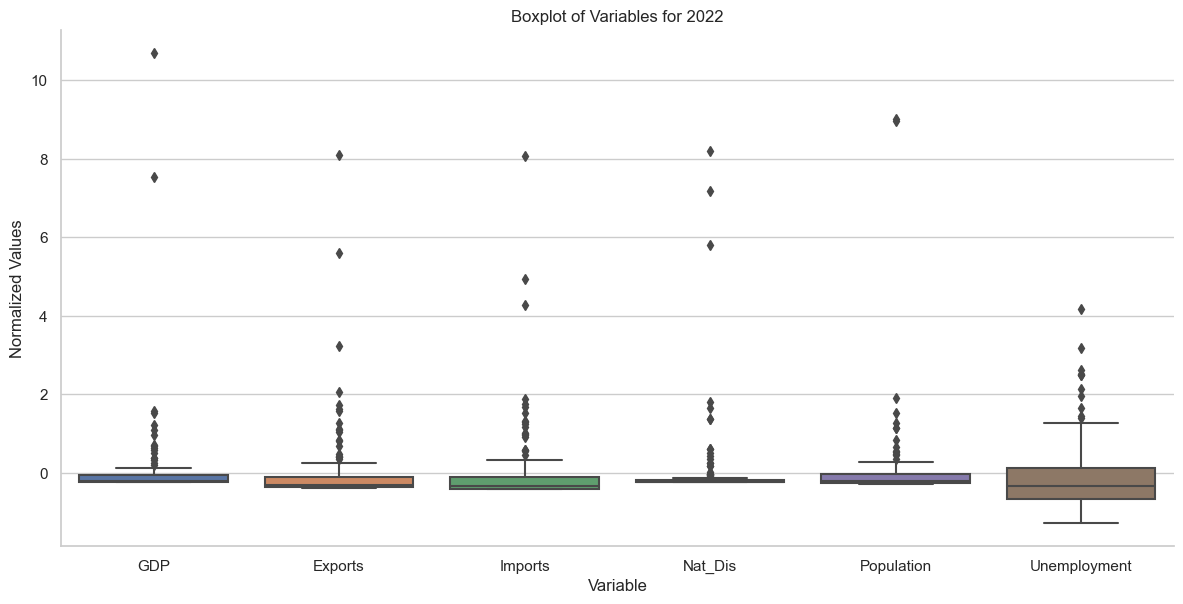

In [ ]:
# Reset the multi-index DataFrame
df_reset = data.reset_index()

# Subset the dataframe for the last year (2022) and transform
last_year_df = df_reset[df_reset.columns[:2].tolist() + [2022]].melt(id_vars=df_reset.columns[:2], var_name='Year', value_name='Values')

# Create boxplot grid and provide labels
g = sns.catplot(x='Variable', y='Values', kind="box", data=last_year_df, height=6, aspect=2)
g.set_axis_labels("Variable", "Normalized Values")
plt.title('Boxplot of Variables for 2022')
plt.show()

Interpretation:
- It can be seen that the boxes are very flat and somewhere between -0.5 and 0, which means that the majority of the data for each variable is located near and below the mean
- Furthermore we have significant outliers for almost every variable. A qualitative analysis is showing, that those outliers seem genuine. For the population for example 

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


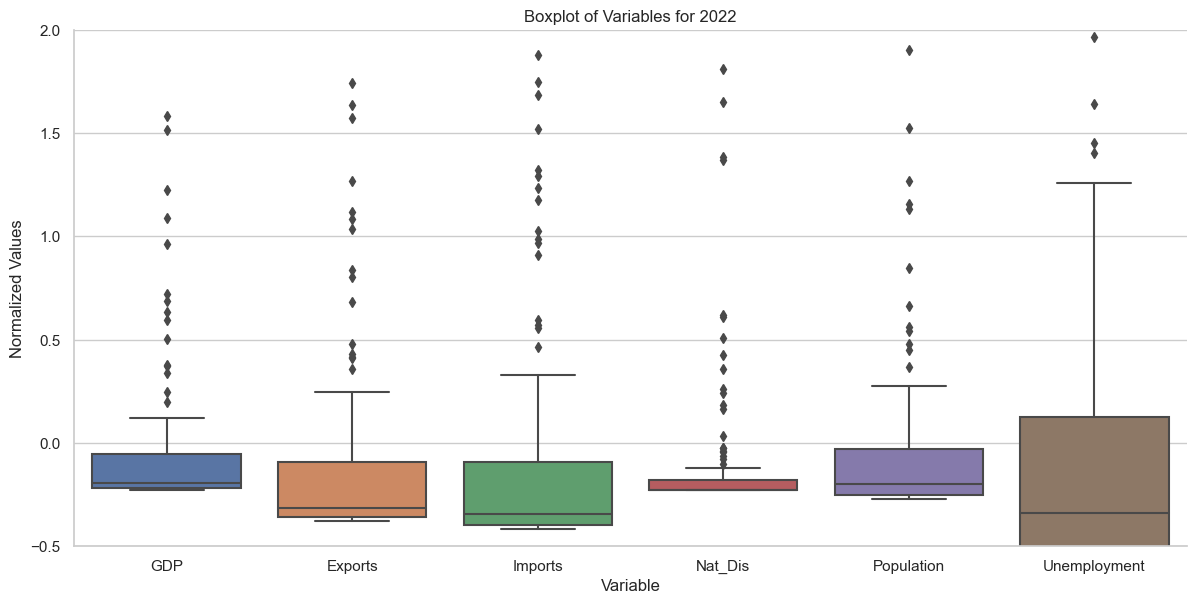

In [ ]:
# The same boxplot but with adjusted y-axis that excludes the outliers but better displays the boxes and median
g = sns.catplot(x='Variable', y='Values', kind="box", data=last_year_df, height=6, aspect=2)
g.set_axis_labels("Variable", "Normalized Values")
plt.ylim(-0.5, 2)
plt.title('Boxplot of Variables for 2022')
plt.show()

**Try different Prediction Methods**

In [ ]:
countrys_mod = data.index.get_level_values(0).unique()
countrys_mod

Index(['Albania', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan',
       'Bahamas, The', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
       ...
       'Tunisia', 'Uganda', 'Ukraine', 'United Kingdom', 'United States',
       'Uruguay', 'Vanuatu', 'Venezuela', 'Vietnam', 'Zambia'],
      dtype='object', name='Country', length=116)

In [ ]:
#Using linear Regression Model to predict next years GDP based on past years (1-5 lags) for each country
max_lag = 5
Results_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
  
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        work_df["Exp_lag"+str(lag)] = work_df["Exports"].shift(lag)
        work_df["Imp_lag"+str(lag)] = work_df["Imports"].shift(lag)
        work_df["Pop_lag"+str(lag)] = work_df["Population"].shift(lag)
        work_df["Nat_lag"+str(lag)] = work_df["Nat_Dis"].shift(lag)
        work_df["Unemp_lag"+str(lag)] = work_df["Unemployment"].shift(lag)
        X = work_df.drop(columns=["GDP", "Exports", "Imports", "Population", "Nat_Dis", "Unemployment"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results_mod.loc[len(Results_mod)] = new_row

In [ ]:
Results_mod = Results_mod.groupby(["Country"]).agg('sum')

In [ ]:
#Show results of averaged MSE over all countries per lag
Results_mod.head()

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.000020,0.000030,0.000056,0.000262,0.000076
Argentina,0.002272,0.012113,0.015569,0.036686,0.009903
Armenia,0.000027,0.000013,0.000268,0.000462,0.000090
Australia,0.005551,0.001568,0.003089,0.160681,0.006016
Azerbaijan,0.000051,0.000072,0.000043,0.000009,0.000008


In [ ]:
for i in range (1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_mod["MSE_lag"+str(i)]), "Average MSE 3a: ", pd.Series.mean(Results["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.008955599783622887 Average MSE 3a:  0.09333258205030387
Average MSE for 2 lags is:  0.008672999340813649 Average MSE 3a:  0.09820506569756104
Average MSE for 3 lags is:  0.022815642321585082 Average MSE 3a:  0.06882933899900413
Average MSE for 4 lags is:  0.159603375855493 Average MSE 3a:  0.08256115552022665
Average MSE for 5 lags is:  0.07951396864929328 Average MSE 3a:  0.11243771830486163


Interpretation Linear Regression before and after modification:
- Ausreiser bei lag 4 - Begründung?

In [ ]:
#categorical variables into dummy? 

In [ ]:
#Use RandomForest again for Prediction similar lags like in linear regression
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 123)
max_lag = 5
Results_RF_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        work_df["Exp_lag"+str(lag)] = work_df["Exports"].shift(lag)
        work_df["Imp_lag"+str(lag)] = work_df["Imports"].shift(lag)
        work_df["Pop_lag"+str(lag)] = work_df["Population"].shift(lag)
        work_df["Nat_lag"+str(lag)] = work_df["Nat_Dis"].shift(lag)
        work_df["Unemp_lag"+str(lag)] = work_df["Unemployment"].shift(lag)
        X = work_df.drop(columns=["GDP", "Exports", "Imports", "Population", "Nat_Dis", "Unemployment"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_rf.fit(X_train, y_train)
        prediction_rf = model_rf.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_rf)}
        Results_RF_mod.loc[len(Results_RF_mod)] = new_row

In [ ]:
Results_RF_mod = Results_RF_mod.groupby(["Country"]).agg('sum')

In [ ]:
#Print Results of Random Forest in comparison to performance without the additional data
for i in range (1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_RF_mod["MSE_lag"+str(i)]), "Average MSE 3a: ", pd.Series.mean(Results_RF["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.0052611927666125595 Average MSE 3a:  0.12288185581036054
Average MSE for 2 lags is:  0.00413938200480252 Average MSE 3a:  0.1235126147801029
Average MSE for 3 lags is:  0.002840911616964427 Average MSE 3a:  0.08409984236336346
Average MSE for 4 lags is:  0.0024718383148809274 Average MSE 3a:  0.10113800307333448
Average MSE for 5 lags is:  0.0019159189674005474 Average MSE 3a:  0.11446646001503397


Interpretation Random Forest before and after modification:
- MSE nimmt nach modification stetig ab mit jedem lag

In [ ]:
#Use Boosting again
model_gb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.2, random_state = 123)
max_lag = 5
Results_GB_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        work_df["Exp_lag"+str(lag)] = work_df["Exports"].shift(lag)
        work_df["Imp_lag"+str(lag)] = work_df["Imports"].shift(lag)
        work_df["Pop_lag"+str(lag)] = work_df["Population"].shift(lag)
        work_df["Nat_lag"+str(lag)] = work_df["Nat_Dis"].shift(lag)
        work_df["Unemp_lag"+str(lag)] = work_df["Unemployment"].shift(lag)
        X = work_df.drop(columns=["GDP", "Exports", "Imports", "Population", "Nat_Dis", "Unemployment"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_gb.fit(X_train, y_train)
        prediction_gb = model_gb.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_gb)}
        Results_GB_mod.loc[len(Results_GB_mod)] = new_row

In [ ]:
Results_GB_mod = Results_GB_mod.groupby(["Country"]).agg('sum')

In [ ]:
#Print Results of Boosting in comparison to performance without the additional data
for i in range (1,6):
    print("Average MSE for "+str(i)+" lags is: ", pd.Series.mean(Results_GB_mod["MSE_lag"+str(i)]), "Average MSE 3a: ", pd.Series.mean(Results_GB["MSE_lag"+str(i)]))

Average MSE for 1 lags is:  0.0030402286014970183 Average MSE 3a:  0.1552264458247081
Average MSE for 2 lags is:  0.0031788988584561207 Average MSE 3a:  0.13538719993199566
Average MSE for 3 lags is:  0.0026769850028556504 Average MSE 3a:  0.099780566339399
Average MSE for 4 lags is:  0.002917794675985577 Average MSE 3a:  0.11083865809543339
Average MSE for 5 lags is:  0.002331421279199618 Average MSE 3a:  0.11838554636490288


Interpretation Gradient Boosting before and after modification:
- Das nicht konstant abnimmt Zufall?

# Problem 4 - Unsupervised Machine Learning 
Use GDP and the information from Problem 3b) to cluster countries. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

In [ ]:
#Package Import
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#Give second index a name (to make it callable)
data.index = data.index.set_names("Kind", level = 1)

In [ ]:
data.head(2)

,,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,Kind,,,,,,,,,,,,,,,,,,,,,
Albania,GDP,-0.223614,-0.216550,-0.215819,-0.222353,-0.227229,-0.224413,-0.216944,-0.210166,-0.205535,-0.202207,...,-0.258801,-0.254160,-0.235935,-0.233922,-0.235789,-0.232625,-0.228109,-0.222368,-0.222372,-0.219001
Argentina,GDP,0.202454,0.199411,0.205303,0.168643,0.183245,0.212412,0.216998,0.175182,0.160267,0.140843,...,0.132347,0.089916,0.151059,0.092080,0.122359,0.037134,-0.004842,-0.030628,-0.010262,0.043766


In [ ]:
# Transform sturcture of data again to make it usable for kmeans
data_piv = data.pivot_table(index = "Country", columns = ["Kind"], aggfunc = sum)


In [ ]:
data_piv.head(2)

1992                                                        \
Kind        Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                     
Albania   -0.351126 -0.223614 -0.370434 -0.169572  -0.228921     3.457043   
Argentina -0.126970  0.202454 -0.192312 -0.056550   0.040710    -0.210396   

               1993                                ...      2021            \
Kind        Exports       GDP   Imports   Nat_Dis  ...   Imports   Nat_Dis   
Country                                            ...                       
Albania   -0.348439 -0.216550 -0.366745 -0.137844  ... -0.385422 -0.210616   
Argentina -0.089675  0.199411 -0.169081 -0.120748  ... -0.192540 -0.156190   

                                       2022                                \
Kind      Population Unemployment   Exports       GDP   Imports   Nat_Dis   
Country                                                                     
Albania    -0.255243     0.893948 -0.359977 -0.219001 -0.399476 -0.226105   
Argentina   0.027102     0.177981 -0.186853  0.043766 -0.172984 -0.226105   

                                   
Kind      Population Unemployment  
Country                            
Albania    -0.256635     0.847112  
Argentina   0.027644    -0.133685  

[2 rows x 186 columns]

In [ ]:
#fit kmeans with different Ks to find best
distortions = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = "auto", random_state=234)
    kmeans.fit(data_piv)
    distortions.append(kmeans.inertia_)

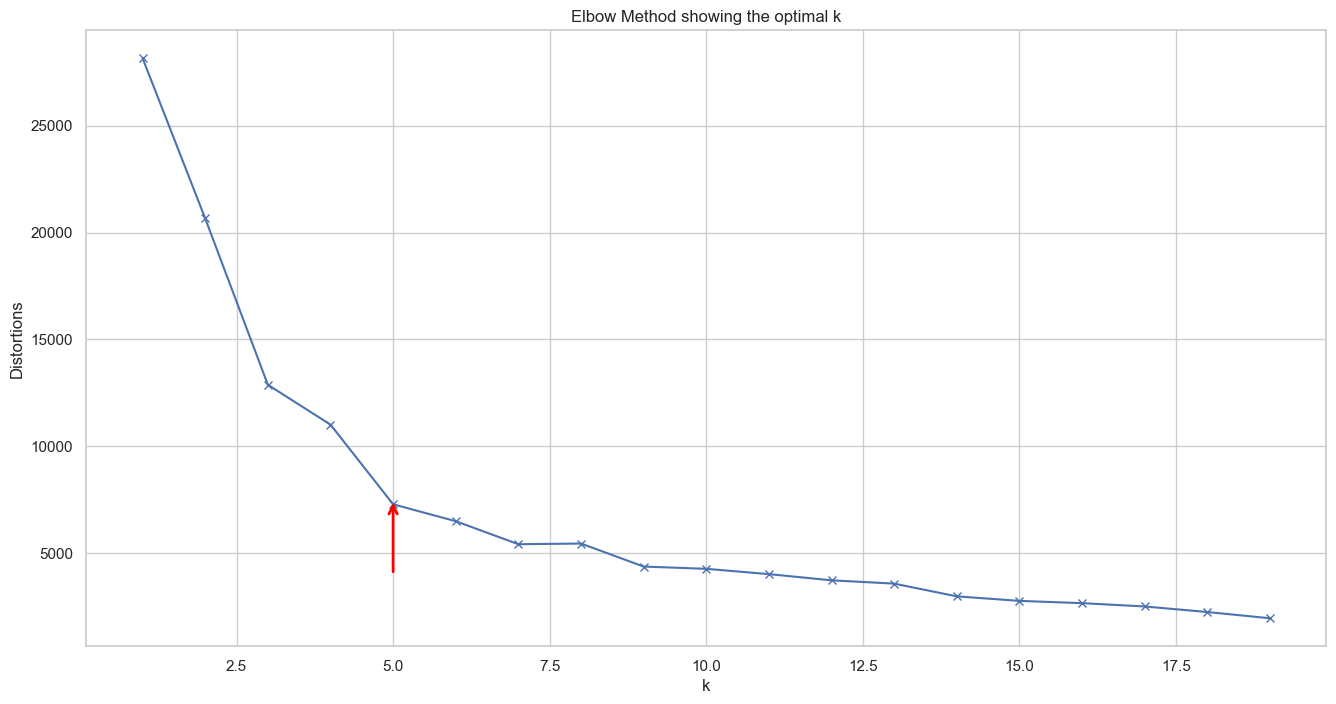

In [ ]:
#Ellbow-Method --> Best Number of Clusters is 5
plt.figure(figsize = (16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (5,7500), xytext = (5,4000), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()


In [ ]:
opt_clusters = 5
kmeans = KMeans(n_clusters=opt_clusters)
y_kmeans = kmeans.fit_predict(data_piv)
y_kmeans

C:\Users\Alina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 4, 1, 4, 0, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0,
       3, 1, 1, 1, 1, 1])

In [ ]:
data_piv['Cluster'] = y_kmeans

In [ ]:
data_piv["Cluster"]

Country
Albania       4
Argentina     1
Armenia       1
Australia     1
Azerbaijan    1
             ..
Uruguay       1
Vanuatu       1
Venezuela     1
Vietnam       1
Zambia        1
Name: Cluster, Length: 116, dtype: int32

In [ ]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_piv.values)
data_piv["pca_1"] = reduced_features[:,0]
data_piv["pca_2"] = reduced_features[:,1]

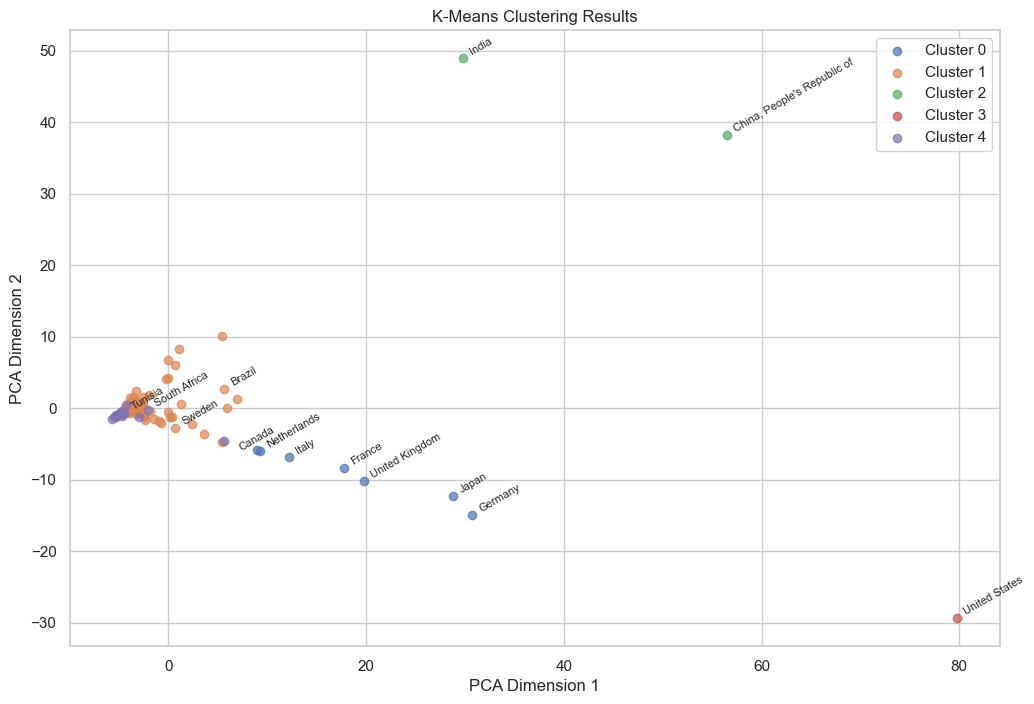

In [ ]:
num_clusters=5
plt.figure(figsize=(12,8))
clusters_to_label = [0,2,3]  # clusters you want to label

for cluster_label in range(num_clusters):
    cluster_data = data_piv[data_piv['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha=0.7
    )
    # if this is a cluster to label, add labels for its points
    if cluster_label in clusters_to_label:
        for i, row in cluster_data.iterrows():
            if i != "Canada":
                plt.text(row['pca_1']+0.5, row['pca_2']+0.5, str(i), fontsize = 8, rotation = 30)
            else: 
                plt.text(row['pca_1']-2, row['pca_2'], str(i), fontsize = 8, rotation = 30)
    else:
        for i, row in cluster_data.sample(2, random_state = 463).iterrows():
            plt.text(row['pca_1']+0.5, row['pca_2']+0.5, str(i), fontsize = 8, rotation = 30)


plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

Interpretation:

# Alternative

In [ ]:
# Alternative Idee: kmeans kann das Time Series Konzept nicht verstehen bzw. die Relevanz der zeitlichen Entwicklung. Vorher war jede Spalte einfach eine eigene Variable.
# Dementsprechend hatten wir pro Land 155 Variablen die erstmal in keinem Zusammenhang stehen
# Version 2: Wir nehmen nur die aktuellsten fünf Jahre von jeden Land und berechnen den Durchschnitt für jede Variable und basieren darauf unser Clustering
# so wollen wir ein clustering errechnen, dass die aktuelle Realität der Länder wiederspiegelt und darauf basierend die optimale Anzahl an Cluster errechnet

In [ ]:
data_piv

1992                                                        \
Kind         Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                      
Albania    -0.351126 -0.223614 -0.370434 -0.169572  -0.228921     3.457043   
Argentina  -0.126970  0.202454 -0.192312 -0.056550   0.040710    -0.210396   
Armenia    -0.353917 -0.224842 -0.365388 -0.206138  -0.226009    -0.917372   
Australia   0.302909  0.306581  0.271945 -0.199489  -0.102367     0.467123   
Azerbaijan -0.342618 -0.223029 -0.366854 -0.206138  -0.192151    -0.917372   
...              ...       ...       ...       ...        ...          ...   
Uruguay    -0.329804 -0.199202 -0.340161 -0.206138  -0.229751     0.192705   
Vanuatu    -0.356164 -0.224673 -0.370340 -0.199489  -0.256385    -0.924969   
Venezuela  -0.161265 -0.124081 -0.188612 -0.206138  -0.073717    -0.004194   
Vietnam    -0.227668 -0.204085 -0.330728  0.747900   0.362801    -0.895976   
Zambia     -0.342481 -0.218983 -0.356824 -0.206138  -0.185994     1.820610   

                1993                                ...         2021  \
Kind         Exports       GDP   Imports   Nat_Dis  ... Unemployment   
Country                                             ...                
Albania    -0.348439 -0.216550 -0.366745 -0.137844  ...     0.893948   
Argentina  -0.089675  0.199411 -0.169081 -0.120748  ...     0.177981   
Armenia    -0.353174 -0.217540 -0.362126 -0.137844  ...     0.902301   
Australia   0.311243  0.270400  0.300261 -0.117328  ...    -0.479336   
Azerbaijan -0.341083 -0.216791 -0.358029 -0.137844  ...    -0.328626   
...              ...       ...       ...       ...  ...          ...   
Uruguay    -0.324163 -0.190410 -0.333981 -0.137844  ...     0.277850   
Vanuatu    -0.354779 -0.218545 -0.368003 -0.133285  ...    -1.024438   
Venezuela  -0.169247 -0.124167 -0.177580 -0.023868  ...    -0.234023   
Vietnam    -0.225105 -0.192388 -0.322775  0.169891  ...    -0.976864   
Zambia     -0.340945 -0.213248 -0.354039 -0.137844  ...    -0.279599   

                2022                                                        \
Kind         Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                      
Albania    -0.359977 -0.219001 -0.399476 -0.226105  -0.256635     0.847112   
Argentina  -0.186853  0.043766 -0.172984 -0.226105   0.027644    -0.133685   
Armenia    -0.357199 -0.218575 -0.394390 -0.226105  -0.256603     0.985276   
Australia   0.480131  0.501732  0.572817 -0.122457  -0.104856    -0.655719   
Azerbaijan -0.328957 -0.196995 -0.307592 -0.226105  -0.208233    -0.323498   
...              ...       ...       ...       ...        ...          ...   
Uruguay    -0.331927 -0.196147 -0.364687 -0.226105  -0.252401     0.115342   
Vanuatu    -0.376028 -0.226497 -0.415302 -0.226105  -0.272654    -0.945697   
Venezuela  -0.301589 -0.187060 -0.218616  0.241982  -0.089662    -0.348217   
Vietnam     0.165674 -0.052905  0.308974 -0.042214   0.367476    -0.976318   
Zambia     -0.357235 -0.214723 -0.389481 -0.216075  -0.143850    -0.200092   

           Cluster     pca_1     pca_2  
Kind                                    
Country                                 
Albania          4 -4.995715 -0.787392  
Argentina        1 -1.881622 -0.431973  
Armenia          1 -4.704553 -0.448362  
Australia        1  2.379850 -2.220996  
Azerbaijan       1 -4.156083 -0.173506  
...            ...       ...       ...  
Uruguay          1 -4.438727 -0.524712  
Vanuatu          1 -4.327501 -0.102341  
Venezuela        1 -2.651207  0.242001  
Vietnam          1  0.017803  4.268207  
Zambia           1 -4.512700 -0.320183  

[116 rows x 189 columns]

In [ ]:
selected_columns = data_piv.loc[:, (slice(2017, 2022), ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population', 'Unemployment'])]
selected_columns

2017                                                        \
Kind         Exports       GDP   Imports   Nat_Dis Population Unemployment   
Country                                                                      
Albania    -0.368961 -0.235789 -0.394882 -0.216655  -0.250639     1.135659   
Argentina  -0.132211  0.122359 -0.194987 -0.244525   0.026867     0.174880   
Armenia    -0.369612 -0.236655 -0.394024 -0.249170  -0.250784     1.012417   
Australia   0.474143  0.541232  0.412007 -0.193430  -0.104235    -0.328298   
Azerbaijan -0.337749 -0.219709 -0.349147 -0.249170  -0.203588    -0.443154   
...              ...       ...       ...       ...        ...          ...   
Uruguay    -0.341557 -0.206695 -0.357821 -0.249170  -0.246940     0.091017   
Vanuatu    -0.382710 -0.242700 -0.405613 -0.249170  -0.268050    -1.035665   
Venezuela  -0.281923 -0.177406 -0.156196 -0.249170  -0.064001    -0.426746   
Vietnam     0.164772 -0.085890  0.262027  1.069992   0.363801    -1.006495   
Zambia     -0.361163 -0.228509 -0.380508 -0.249170  -0.153413     0.205873   

                2018                                ...      2021            \
Kind         Exports       GDP   Imports   Nat_Dis  ...   Imports   Nat_Dis   
Country                                             ...                       
Albania    -0.369595 -0.232625 -0.399239 -0.154067  ... -0.385422 -0.210616   
Argentina  -0.153438  0.037134 -0.208724 -0.149341  ... -0.192540 -0.156190   
Armenia    -0.369481 -0.234055 -0.398911 -0.154067  ... -0.387101 -0.210616   
Australia   0.456664  0.509937  0.426433 -0.154067  ...  0.405177 -0.185217   
Azerbaijan -0.339658 -0.215698 -0.343683 -0.154067  ... -0.338819 -0.210616   
...              ...       ...       ...       ...  ...       ...       ...   
Uruguay    -0.344818 -0.206467 -0.365705 -0.154067  ... -0.354690 -0.210616   
Vanuatu    -0.383628 -0.240162 -0.411062 -0.154067  ... -0.398378 -0.210616   
Venezuela  -0.292708 -0.186614 -0.180716 -0.149341  ... -0.196447 -0.043710   
Vietnam     0.159803 -0.079378  0.290600  0.162522  ...  0.402396 -0.083623   
Zambia     -0.362776 -0.226717 -0.385277 -0.154067  ... -0.371540 -0.210616   

                                        2022                                \
Kind       Population Unemployment   Exports       GDP   Imports   Nat_Dis   
Country                                                                      
Albania     -0.255243     0.893948 -0.359977 -0.219001 -0.399476 -0.226105   
Argentina    0.027102     0.177981 -0.186853  0.043766 -0.172984 -0.226105   
Armenia     -0.255379     0.902301 -0.357199 -0.218575 -0.394390 -0.226105   
Australia   -0.105023    -0.479336  0.480131  0.501732  0.572817 -0.122457   
Azerbaijan  -0.207135    -0.328626 -0.328957 -0.196995 -0.307592 -0.226105   
...               ...          ...       ...       ...       ...       ...   
Uruguay     -0.251207     0.277850 -0.331927 -0.196147 -0.364687 -0.226105   
Vanuatu     -0.271610    -1.024438 -0.376028 -0.226497 -0.415302 -0.226105   
Venezuela   -0.088529    -0.234023 -0.301589 -0.187060 -0.218616  0.241982   
Vietnam      0.366327    -0.976864  0.165674 -0.052905  0.308974 -0.042214   
Zambia      -0.145834    -0.279599 -0.357235 -0.214723 -0.389481 -0.216075   

                                    
Kind       Population Unemployment  
Country                             
Albania     -0.256635     0.847112  
Argentina    0.027644    -0.133685  
Armenia     -0.256603     0.985276  
Australia   -0.104856    -0.655719  
Azerbaijan  -0.208233    -0.323498  
...               ...          ...  
Uruguay     -0.252401     0.115342  
Vanuatu     -0.272654    -0.945697  
Venezuela   -0.089662    -0.348217  
Vietnam      0.367476    -0.976318  
Zambia      -0.143850    -0.200092  

[116 rows x 36 columns]

In [ ]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
average_df = pd.DataFrame()

# Durchschnitt über die ausgewählten Jahre für jede Variable
for variable in ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population', 'Unemployment']:
    # Wir benutzen .loc zum Indizieren der Jahre und xs für das zweite Level des MultiIndex
    average_df[variable] = selected_columns.loc[:, (years, variable)].mean(axis=1)

average_df


,Exports,GDP,Imports,Nat_Dis,Population,Unemployment
Country,,,,,,
Albania,-0.363851,-0.226711,-0.394284,-0.188635,-0.253489,0.935752
Argentina,-0.183835,0.026254,-0.195720,-0.207983,0.026948,0.297025
Armenia,-0.363962,-0.227725,-0.392992,-0.230013,-0.253637,0.964114
Australia,0.419424,0.501355,0.474718,-0.174029,-0.104147,-0.404612
Azerbaijan,-0.335918,-0.209654,-0.340081,-0.230013,-0.205766,-0.343052
...,...,...,...,...,...,...
Uruguay,-0.339299,-0.203408,-0.361065,-0.230013,-0.249584,0.244529
Vanuatu,-0.378421,-0.234122,-0.406409,-0.228486,-0.270252,-1.013054
Venezuela,-0.288184,-0.193699,-0.179411,-0.117637,-0.079608,-0.307319


In [ ]:
average_df.loc["China, People's Republic of"]

Exports         5.711638
GDP             7.272997
Imports         7.275208
Nat_Dis         1.359914
Population      9.054574
Unemployment   -0.512148
Name: China, People's Republic of, dtype: float64

In [ ]:
#fit kmeans with different Ks to find best
distortions_avg = []
K = range(1,20)
for k in K:
    kmeans_avg = KMeans(n_clusters = k, n_init = "auto", random_state=234)
    kmeans_avg.fit(average_df)
    distortions_avg.append(kmeans_avg.inertia_)

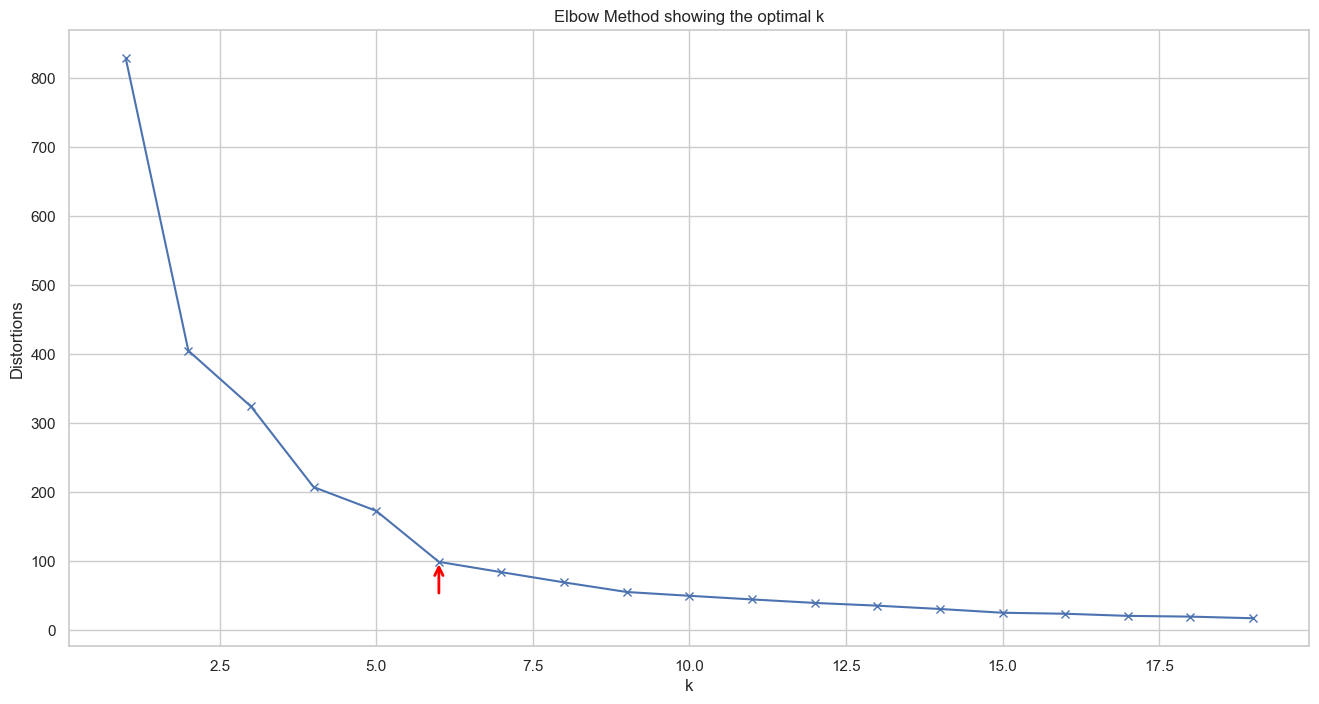

In [ ]:
#Ellbow-Method --> Best Number of Clusters is 5
plt.figure(figsize = (16,8))
plt.plot(K, distortions_avg, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (6,100), xytext = (6,50), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()

In [ ]:
# Optimal number of clusters is the one that you decide based on the elbow plot
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(average_df)

In [ ]:
average_df['Cluster'] = pred_y

In [ ]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(average_df.values)
average_df["pca_1"] = reduced_features[:,0]
average_df["pca_2"] = reduced_features[:,1]

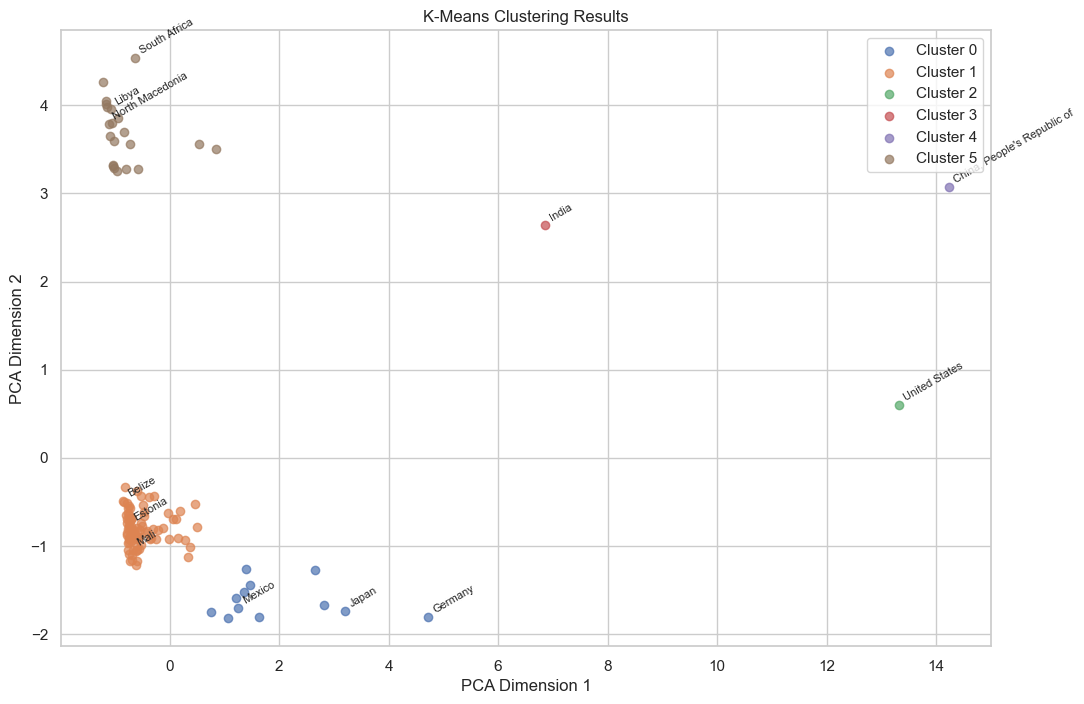

In [ ]:
num_clusters=6
plt.figure(figsize=(12,8))
clusters_to_label = [2,3,4]  # clusters you want to label

for cluster_label in range(num_clusters):
    cluster_data = average_df[average_df['Cluster'] == cluster_label]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha=0.7
    )
    # if this is a cluster to label, add labels for its points
    if cluster_label in clusters_to_label:
        for i, row in cluster_data.iterrows():
            if i != "Canada":
                plt.text(row['pca_1']+0.05, row['pca_2']+0.05, str(i), fontsize = 8, rotation = 30)
            else: 
                plt.text(row['pca_1']-0.2, row['pca_2'], str(i), fontsize = 8, rotation = 30)
    else:
        for i, row in cluster_data.sample(3, random_state = 201).iterrows():
            plt.text(row['pca_1']+0.05, row['pca_2']+0.05, str(i), fontsize = 8, rotation = 30)


plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [ ]:
average_df[average_df['Cluster'] == 0]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
Canada,1.068716,0.667034,1.103350,0.304236,-0.022244,-0.140297,0,1.353364,-1.519023
France,1.795131,1.137253,1.821235,1.798018,0.174824,0.175958,0,2.661688,-1.278352
Germany,3.274316,1.741850,4.475505,-0.097010,0.279086,-0.730347,0,4.725542,-1.810835
Hong Kong SAR,1.357124,-0.056325,1.357304,-0.228803,-0.223025,-0.603053,0,1.061069,-1.820952
Indonesia,0.123040,0.323563,0.195771,2.706011,1.519748,-0.646813,0,1.465979,-1.439566
Italy,0.972237,0.772534,1.292140,-0.165295,0.123375,0.433147,0,1.385502,-1.258233
Japan,1.702017,2.224796,1.891306,0.283117,0.564628,-0.877949,0,3.196078,-1.743254
Mexico,0.775968,0.381366,0.889228,0.298409,0.558581,-0.689604,0,1.250354,-1.708088
Netherlands,1.665032,0.227728,1.640240,0.258932,-0.156980,-0.640635,0,1.627884,-1.802979


Interpretation:


Cluster 0: Relative gerine Unemployment Rate, Starkt unterschiedliche Population, Hohe Ex- und/oder Importe, Völligst unterschiedlich von Naturkatastrophen betroffen


In [ ]:
average_df[average_df['Cluster'] == 1]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
Argentina,-0.183835,0.026254,-0.195720,-0.207983,0.026948,0.297025,1,-0.376883,-0.449587
Australia,0.419424,0.501355,0.474718,-0.174029,-0.104147,-0.404612,1,0.496257,-0.784081
Azerbaijan,-0.335918,-0.209654,-0.340081,-0.230013,-0.205766,-0.343052,1,-0.707005,-0.778033
"Bahamas, The",-0.368907,-0.228570,-0.396790,0.020991,-0.269610,0.612683,1,-0.810742,-0.333627
Bangladesh,-0.232424,-0.052265,-0.290965,0.467214,0.831152,-0.501521,1,0.058219,-0.689833
...,...,...,...,...,...,...,...,...,...
Uruguay,-0.339299,-0.203408,-0.361065,-0.230013,-0.249584,0.244529,1,-0.778672,-0.512596
Vanuatu,-0.378421,-0.234122,-0.406409,-0.228486,-0.270252,-1.013054,1,-0.750825,-1.092835
Venezuela,-0.288184,-0.193699,-0.179411,-0.117637,-0.079608,-0.307319,1,-0.522410,-0.743666


Cluster 1:

In [ ]:
average_df[average_df['Cluster'] == 2]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
United States,7.904593,10.621011,5.964129,0.978097,1.911862,-0.479026,2,13.318807,0.600597


Cluster 2: Aufgrund extrem hohem GDP und überdurchschnittlichen Ex- und Importen ein eigenes Cluster


In [ ]:
average_df[average_df['Cluster'] == 3]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
India,1.053041,1.204454,1.111932,7.457924,8.926507,0.080513,3,6.855768,2.64454


Cluster 3: Aufgrund der extremen Betroffenheit von Naturkatastrophen und der hohen Population eigenes Cluster. Beachte jedoch dass wir für die Betroffenheit der Naturkatastrophen die Anzahl an Toten genutzt haben. Diese steigt selbstverständlich im Verhältnis zur Population
--> Zukünftige Verbesserung Betroffenen Perosnen von Naturkatastrophen ins Verhältnis zur Population setzten oder die Naturkatastrophen nur als Dummy-Variable (0 oder 1) verwenden

In [ ]:
average_df[average_df['Cluster'] == 4]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
"China, People's Republic of",5.711638,7.272997,7.275208,1.359914,9.054574,-0.512148,4,14.231993,3.068504


Cluster 4: Eigenes Cluster da in jeglicher Komponente abweichend von restlichen Daten (Hohes GDP, Hohe Ex- und Import, Extrem hohe Population)

In [ ]:
average_df[average_df['Cluster'] == 5]

,Exports,GDP,Imports,Nat_Dis,Population,Unemployment,Cluster,pca_1,pca_2
Country,,,,,,,,,
Albania,-0.363851,-0.226711,-0.394284,-0.188635,-0.253489,0.935752,5,-1.031401,3.316994
Armenia,-0.363962,-0.227725,-0.392992,-0.230013,-0.253637,0.964114,5,-1.041717,3.327918
Bosnia and Herzegovina,-0.354166,-0.223974,-0.384441,-0.228750,-0.250167,1.671219,5,-1.081958,3.653160
Botswana,-0.361979,-0.226083,-0.388913,-0.230013,-0.255597,2.394458,5,-1.145729,3.984844
Brazil,0.345728,0.677521,0.354002,0.209413,1.134297,0.911981,5,0.854609,3.506799
Colombia,-0.213303,-0.076368,-0.272362,0.263688,0.061427,0.707984,5,-0.573609,3.274125
Costa Rica,-0.328350,-0.202778,-0.348441,-0.217741,-0.238517,0.799139,5,-0.968104,3.254392
Eswatini,-0.374456,-0.232366,-0.402005,-0.230013,-0.264500,3.005160,5,-1.211049,4.264491
Gabon,-0.367009,-0.225851,-0.382647,-0.230013,-0.257277,2.542237,5,-1.156743,4.052533


Cluster 5: